In [83]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB 1.3 MB/s eta 0:00:01
   ---- ----------------------------------- 30.7/300.2 kB 1.3 MB/s eta 0:00:01
   --------- ----------------------------- 71.7/300.2 kB 558.5 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 435.7 kB/s eta 0:00:01
   ------------------------ ------------- 194.6/300.2 kB 841.6 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/300.2 kB 689.9 kB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 883.9 kB/s eta 0:00:00


In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import seaborn as sns
from wordcloud import WordCloud

In [7]:
Data_ASR_2 = pd.read_csv("C:\\Users\\oksan\\OneDrive\\Documents\\учеба\\курсач\\Data_ASR_2.csv")

## Статистический анализ

In [5]:
Data_ASR_2.head()

,video,start_time,end_time,sentiment,happy,sad,anger,surprise,disgust,fear,text,ASR
0,--qXJuDtHPw,23.1990,30.3250,1.000000,0.666667,0.000000,0.0,0.0,0.0,0.000000,I see that a writer is somebody who has an inc...,peter and i see that a writer is somebody who...
1,-3g5yACwYnA,82.7645,100.5550,1.000000,0.666667,0.666667,0.0,0.0,0.0,0.666667,Key is part of the people that we use to solve...,key part of the people that we use the to sel...
2,-3g5yACwYnA,119.9190,125.2990,0.666667,0.000000,0.000000,0.0,0.0,0.0,0.000000,They've been able to find solutions or at leas...,is that we do they have been able to find sol...
3,-3g5yACwYnA,4.8400,13.6315,0.000000,0.666667,0.666667,0.0,0.0,0.0,0.333333,Key Polymer brings a technical aspect to our o...,creations and key brings a keep our brains ar...
4,-3g5yACwYnA,13.6315,27.0310,0.000000,0.333333,0.333333,0.0,0.0,0.0,0.000000,We're a huge user of adhesives for our operati...,we are a huge a user of adhesives for our ope...


In [6]:
Data_ASR_2.shape

(23259, 12)

Всего корпус данных содержит 23259 объектов, каждый из которых имеет 12 характеристик.

### Анализ длительности

In [7]:
times = Data_ASR_2['end_time'] - Data_ASR_2['start_time']

In [8]:
print(f' Максимальная длина аудио: {round(times.max(), 2)}')
print(f' Минимальная длина аудио: {round(times.min(), 2)}')
print(f' Средняя длина аудио: {round(times.mean(), 2)}')
print(f' Медианная длина аудио: {round(times.median(), 2)}')

 Максимальная длина аудио: 108.93
 Минимальная длина аудио: 0.12
 Средняя длина аудио: 7.22
 Медианная длина аудио: 6.1


### Анализ текста

In [9]:
text = Data_ASR_2['text']

print(f' Максимальная длина текста в символах: {round(text.apply(len).max(), 2)}')
print(f' Минимальная длина текста в символах: {round(text.apply(len).min(), 2)}')
print(f' Средняя длина текста в символах: {round(text.apply(len).mean(), 2)}')
print(f' Медианная длина текста в символах: {round(text.apply(len).median(), 2)}')

 Максимальная длина текста в символах: 1663
 Минимальная длина текста в символах: 2
 Средняя длина текста в символах: 108.05
 Медианная длина текста в символах: 93.0


In [10]:
set(text[text.apply(lambda x: len(x) == 2)].tolist())

{' M', 'Hi'}

Самый короткий текст в корпусе данных состоит из двух символов: либо из слова "Hi", либо из слова " M".

### Анализ тональности

In [11]:
sentiment = Data_ASR_2['sentiment']

In [52]:
uniq_sentiments = sorted(list(sentiment.unique().tolist()))
print(f'Корпус данных имеет {len(uniq_sentiments)} уникальных значений тональности: {uniq_sentiments}.')
print(f'Среднее значение тональности по корпусу: {round(np.mean(sentiment.tolist()), 2)}.')

Корпус данных имеет 28 уникальных значений тональности: [-3.0, -2.6666667, -2.3333333, -2.0, -1.6666666, -1.3333334, -1.0, -0.6666667, -0.5, -0.33333334, -0.16666667, 0.0, 0.16666667, 0.33333334, 0.5, 0.6666667, 0.8333333, 1.0, 1.1666666, 1.3333334, 1.5, 1.6666666, 1.8333334, 2.0, 2.3333333, 2.5, 2.6666667, 3.0].
Среднее значение тональности по корпусу: 0.15.


При значении больше нуля тональность позитивная, при значении меньше нуля - негативная, при значении, равном нулю - нейтральная. Так как среднее значение больше нуля, корпус более позитивно окрашен. Однако, отклонение от нуля достаточно небольшое, поэтому можно сказать, что в целом корпус сбалансирован по тональности.

In [16]:
sentiment.value_counts()

sentiment
 0.000000    5100
 0.333333    3060
 0.666667    2564
 1.000000    1923
-0.333333    1569
 1.333333    1432
-0.666667    1129
 1.666667    1034
-1.000000     904
-1.333333     836
-1.666667     765
 2.000000     746
-2.000000     652
-2.333333     413
 2.333333     405
-2.666667     282
 2.666667     208
-3.000000     126
 3.000000      61
 0.166667      11
 0.500000      11
 1.500000       8
 0.833333       7
-0.500000       4
-0.166667       3
 1.166667       3
 1.833333       2
 2.500000       1
Name: count, dtype: int64

Из всех значений тональности, больше всего в корпусе нейтральный аудиозаписей (5100).

In [38]:
len(Data_ASR_2[Data_ASR_2['sentiment'] > 0])

11476

In [40]:
len(Data_ASR_2[Data_ASR_2['sentiment'] < 0])

6683

Аудиозаписей с положительной тональностью 11476, с отрицательной - 6683.

### Анализ эмоций

In [48]:
emotions_df = Data_ASR_2.select_dtypes(exclude=['object']).drop(columns=['start_time', 'end_time', 'sentiment'])

In [72]:
for c in emotions_df.columns:
    counts = len(emotions_df[emotions_df[c] > 0])
    print(f'Количество эмоционально открашенных строк с эмоцией {c}: {counts}.')

Количество эмоционально открашенных строк с эмоцией happy: 12465.
Количество эмоционально открашенных строк с эмоцией sad: 5998.
Количество эмоционально открашенных строк с эмоцией anger: 4997.
Количество эмоционально открашенных строк с эмоцией surprise: 2320.
Количество эмоционально открашенных строк с эмоцией disgust: 4097.
Количество эмоционально открашенных строк с эмоцией fear: 1913.


In [49]:
emotions_df.mean()

happy       0.480001
sad         0.157287
anger       0.155725
surprise    0.047881
disgust     0.119495
fear        0.040981
dtype: float64

In [57]:
emotions_df.median()

happy       0.333333
sad         0.000000
anger       0.000000
surprise    0.000000
disgust     0.000000
fear        0.000000
dtype: float64

In [51]:
emotions_df.var()

happy       0.395919
sad         0.105215
anger       0.131196
surprise    0.028292
disgust     0.102151
fear        0.023264
dtype: float64

In [50]:
emotions_df.std()

happy       0.629221
sad         0.324369
anger       0.362210
surprise    0.168202
disgust     0.319611
fear        0.152526
dtype: float64

## Визуальный анализ

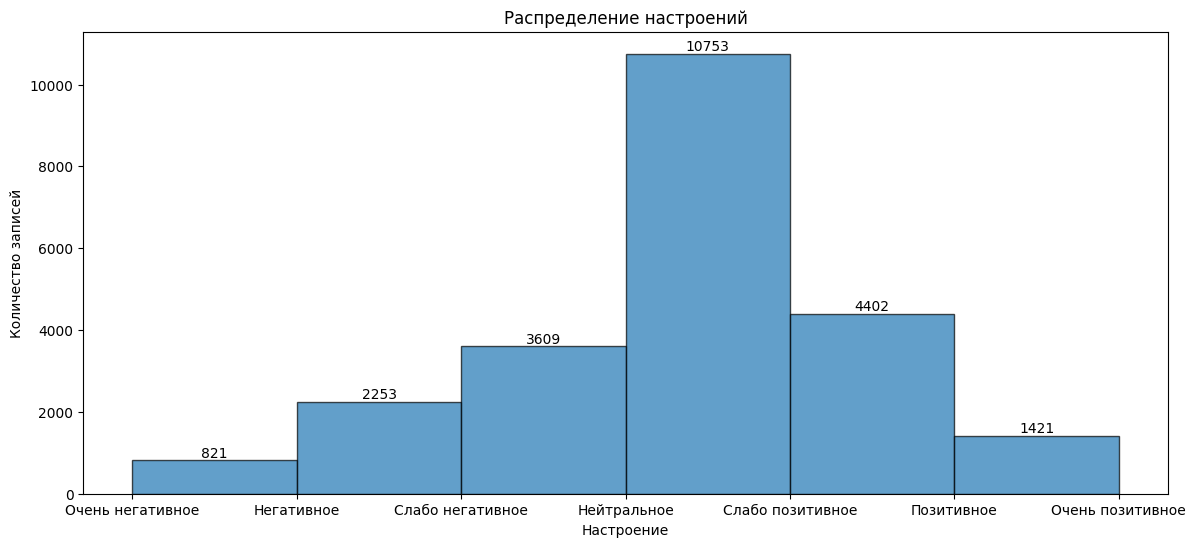

In [35]:
# Построим гистограмму распределения настроений
plt.figure(figsize=(14, 6))
counts, edges, bars = plt.hist(Data_ASR_2['sentiment'], bins=6, edgecolor='black', alpha=0.7)
plt.bar_label(bars)
plt.xlabel('Настроение')
plt.ylabel('Количество записей')
plt.title('Распределение настроений')
plt.xticks([-3, -2, -1, 0, 1, 2, 3], labels=['Очень негативное', 'Негативное', 'Слабо негативное', 'Нейтральное', 'Слабо позитивное', 'Позитивное', 'Очень позитивное'])
plt.show()

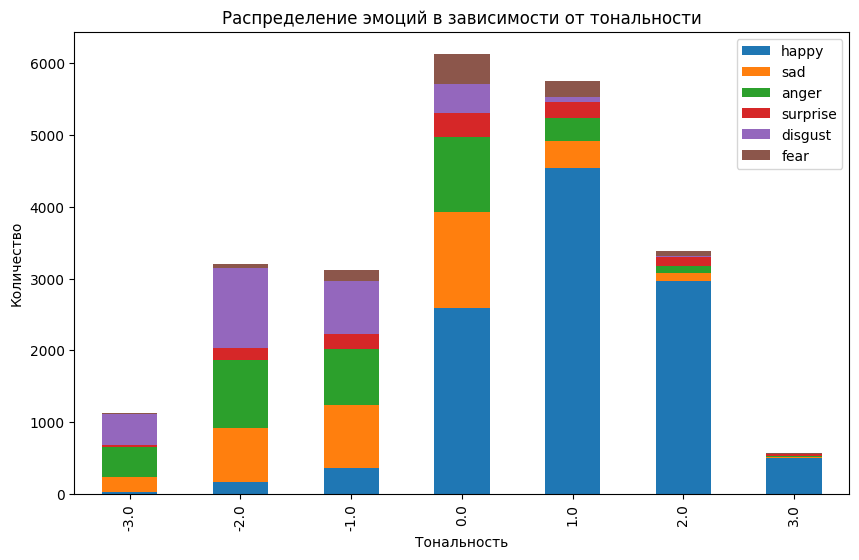

In [82]:
rounded_Data_ASR_2 = Data_ASR_2
rounded_Data_ASR_2['sentiment'] = rounded_Data_ASR_2['sentiment'].round()
grouped_data = rounded_Data_ASR_2.groupby('sentiment').sum()[['happy', 'sad', 'anger', 'surprise', 'disgust', 'fear']]

grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Тональность')
plt.ylabel('Количество')
plt.title('Распределение эмоций в зависимости от тональности')
plt.show()

## Корреляционный анализ

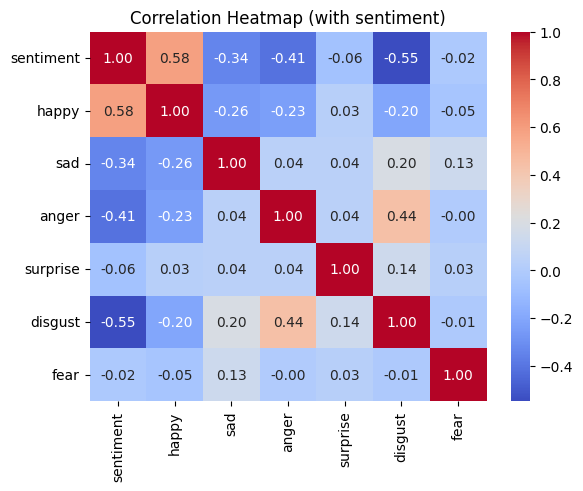

In [103]:
numeric_data = Data_ASR_2.drop(columns=['video', 'text', 'ASR', 'start_time', 'end_time']) 
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (with sentiment)')
plt.show()

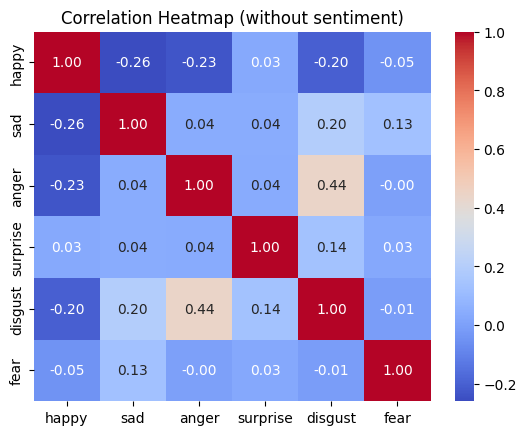

In [102]:
numeric_data = Data_ASR_2.drop(columns=['video', 'text', 'ASR', 'start_time', 'end_time', 'sentiment']) 
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (without sentiment)')
plt.show()